In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

In [9]:
df = pd.read_csv('Student Performance.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


EDA (Exploratory Data Analysis)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [14]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [16]:
df.duplicated().sum()

0

In [18]:
gender = df['Gender']
ethnicity = df['Ethnicity']
parental_education = df['ParentalEducation']
parental_support = df['ParentalSupport']
grade_class = df['GradeClass']

columns_list = [gender, ethnicity, parental_education, parental_support, grade_class]

values_list = [[0, 1],
               [0, 1, 2, 3],
               [0, 1, 2, 3, 4],
               [0, 1, 2, 3, 4],
               [0, 1, 2, 3, 4]]

categories_val = [['Male', 'Female'],
                  ['Caucasian', 'African American', 'Asian', 'Other'],
                  ['None', 'High School', 'Some College', "Bachelor's", 'Higher'],
                  ['None', 'Low', 'Moderate', 'High', 'Very High'],
                  ['A', 'B', 'C', 'D', 'F']]

for columns, values, categories in zip(columns_list, values_list, categories_val):
    columns.replace(values, categories, inplace=True)

new_df = df.copy()
new_df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,1,Moderate,0,0,1,0,2.929196,C
1,1002,18,Male,Caucasian,High School,15.408756,0,0,Low,0,0,0,0,3.042915,B
2,1003,15,Male,Asian,Bachelor's,4.210570,26,0,Moderate,0,0,0,0,0.112602,F
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,0,High,1,0,0,0,2.054218,D
4,1005,17,Female,Caucasian,Some College,4.672495,17,1,High,0,0,0,0,1.288061,F


In [19]:
new_df.describe()

,StudentID,Age,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,GPA
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,9.771992,14.541388,0.301421,0.383361,0.303512,0.196906,0.157191,1.906186
std,690.655244,1.123798,5.652774,8.467417,0.458971,0.486307,0.459870,0.397744,0.364057,0.915156
min,1001.000000,15.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,5.043079,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.174803
50%,2196.500000,16.000000,9.705363,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.893393
75%,2794.250000,17.000000,14.408410,22.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.622216
max,3392.000000,18.000000,19.978094,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   object 
 3   Ethnicity          2392 non-null   object 
 4   ParentalEducation  2392 non-null   object 
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   object 
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   object 
dtypes: float64(2), int64(8), object(5)
memory usage: 280.4+ KB


In [23]:
new_df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [26]:
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation','ParentalSupport','GradeClass']

In [28]:
numerical_columns = ['StudentID', 'Age','StudyTimeWeekly', 'Absences', 'Tutoring','Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']

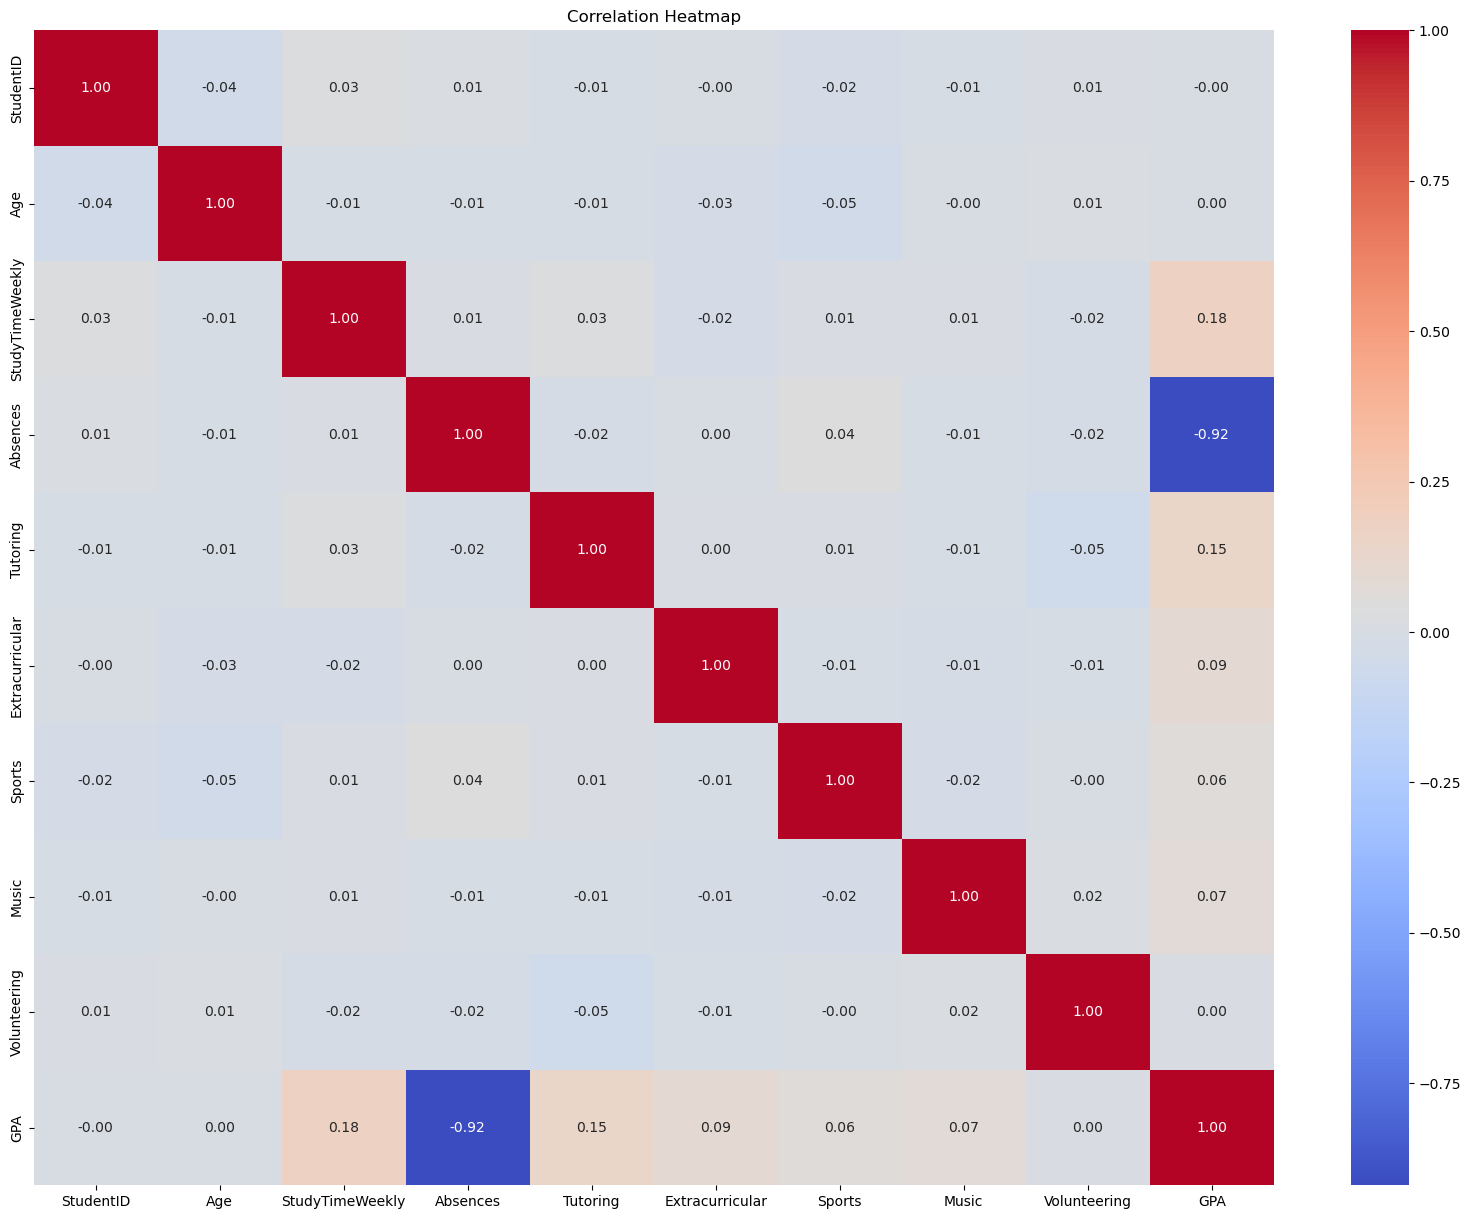

In [30]:
corr = new_df.corr(numeric_only = True)
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Preprocessing of Data

In [32]:
grade_class = new_df['GradeClass']
values_lists = ['A', 'B', 'C', 'D', 'F']
categories_vals = [0.0, 1.0, 2.0, 3.0, 4.0]

grade_class = grade_class.replace(values_lists, categories_vals, inplace=True)

new_data = new_df.copy()
new_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,1,Moderate,0,0,1,0,2.929196,2.0
1,1002,18,Male,Caucasian,High School,15.408756,0,0,Low,0,0,0,0,3.042915,1.0
2,1003,15,Male,Asian,Bachelor's,4.210570,26,0,Moderate,0,0,0,0,0.112602,4.0
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,0,High,1,0,0,0,2.054218,3.0
4,1005,17,Female,Caucasian,Some College,4.672495,17,1,High,0,0,0,0,1.288061,4.0


In [33]:
one_hot_encoding = pd.get_dummies(new_df, columns=['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport'])
new_dataset = one_hot_encoding.copy()
new_dataset.columns

Index(['StudentID', 'Age', 'StudyTimeWeekly', 'Absences', 'Tutoring',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass', 'Gender_Female', 'Gender_Male',
       'Ethnicity_African American', 'Ethnicity_Asian', 'Ethnicity_Caucasian',
       'Ethnicity_Other', 'ParentalEducation_Bachelor's',
       'ParentalEducation_High School', 'ParentalEducation_Higher',
       'ParentalEducation_None', 'ParentalEducation_Some College',
       'ParentalSupport_High', 'ParentalSupport_Low',
       'ParentalSupport_Moderate', 'ParentalSupport_None',
       'ParentalSupport_Very High'],
      dtype='object')

In [34]:
clean_data = new_dataset.replace([True, False], [1, 0])
clean_data.rename(columns={
    'Gender_Female': 'Female',
    'Gender_Male': 'Male',
    'Ethnicity_African American': 'E_African_American',
    'Ethnicity_Asian': 'E_Asian',
    'Ethnicity_Caucasian': 'E_Caucasian',
    'Ethnicity_Other': 'E_Other',
    "ParentalEducation_Bachelor's": "PE_Bachelor's",
    'ParentalEducation_High School': 'PE_High_School', 
    'ParentalEducation_Higher': 'PE_Higher', 
    'ParentalEducation_None': 'PE_None',
    'ParentalEducation_Some College': 'PE_Some_College',
    'ParentalSupport_High': 'PS_High',
    'ParentalSupport_Low': 'PS_Low',
    'ParentalSupport_Moderate': 'PS_Moderate',
    'ParentalSupport_None': 'PS_None',
    'ParentalSupport_Very High': 'PS_Very_High'
}, inplace=True)

clean_data.head()

,StudentID,Age,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,GPA,...,PE_Bachelor's,PE_High_School,PE_Higher,PE_None,PE_Some_College,PS_High,PS_Low,PS_Moderate,PS_None,PS_Very_High
0,1001,17,19.833723,7,1,0,0,1,0,2.929196,...,0,0,0,0,1,0,0,1,0,0
1,1002,18,15.408756,0,0,0,0,0,0,3.042915,...,0,1,0,0,0,0,1,0,0,0
2,1003,15,4.210570,26,0,0,0,0,0,0.112602,...,1,0,0,0,0,0,0,1,0,0
3,1004,17,10.028829,14,0,1,0,0,0,2.054218,...,1,0,0,0,0,1,0,0,0,0
4,1005,17,4.672495,17,1,0,0,0,0,1.288061,...,0,0,0,0,1,1,0,0,0,0


In [35]:
X = clean_data.drop(['GradeClass', 'StudentID'], axis='columns')
y = clean_data['GradeClass']

In [36]:
scaler = StandardScaler()
scaler.fit(X.values)

scaled_data= scaler.transform(X.values)
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)
X_scaled.head(3)

,Age,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,GPA,Female,...,PE_Bachelor's,PE_High_School,PE_Higher,PE_None,PE_Some_College,PS_High,PS_Low,PS_Moderate,PS_None,PS_Very_High
0,0.472919,1.780336,-0.890822,1.522371,-0.788476,-0.660132,2.019544,-0.431866,1.118086,0.978492,...,-0.425717,-0.661438,-0.229819,-0.336268,1.249411,-0.641256,-0.506915,1.494133,-0.311846,-0.344678
1,1.362944,0.997376,-1.717694,-0.656870,-0.788476,-0.660132,-0.495161,-0.431866,1.242374,-1.021981,...,-0.425717,1.511858,-0.229819,-0.336268,-0.800377,-0.641256,1.972718,-0.669285,-0.311846,-0.344678
2,-1.307132,-0.984045,1.353542,-0.656870,-0.788476,-0.660132,-0.495161,-0.431866,-1.960277,-1.021981,...,2.348981,-0.661438,-0.229819,-0.336268,-0.800377,-0.641256,-0.506915,1.494133,-0.311846,-0.344678


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [38]:
models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=1000, max_depth=10, max_features="sqrt", random_state=42),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=1000, max_depth=10, max_features="sqrt", random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(),
    'LinearRegression': LinearRegression(),
    'Support Vector Machine': SVC(random_state=42)
}

In [39]:
def training_models(X_training, y_training):
    trained_models = {}
    
    for name_train, model_train in models.items():
        model = model_train.fit(X_training.values, y_training)
        trained_models[name_train] = model
    return trained_models

In [43]:
trained_model = training_models(X_train, y_train)
trained_model

{'RandomForestClassifier': RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42),
 'RandomForestRegressor': RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=1000,
                       random_state=42),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
 'LogisticRegression': LogisticRegression(),
 'LinearRegression': LinearRegression(),
 'Support Vector Machine': SVC(random_state=42)}

In [46]:
def checking_acc(X_testing, y_testing):
    results = []
    
    for name_test, model_test in trained_model.items():
        test_score = model_test.score(X_testing.values, y_testing)
        results.append({'Model': name_test, 'Test Accuracy(%)': round((test_score*100), 2)})
        
        results_df = pd.DataFrame(results)
    return results_df

In [51]:
test_acc = checking_acc(X_test, y_test)
test_acc

,Model,Test Accuracy(%)
0,RandomForestClassifier,90.61
1,RandomForestRegressor,76.05
2,DecisionTreeClassifier,83.92
3,LogisticRegression,73.70
4,LinearRegression,63.38
5,Support Vector Machine,73.07


In [52]:
prediction = models['RandomForestClassifier']

print(prediction.predict(scaler.transform([[17, 19.833723, 7, 1, 0, 0, 1, 0, 2.929196, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]))[0])
print(prediction.predict(scaler.transform([[18, 15.408756, 0, 0, 0, 0, 0, 0, 3.042915, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]]))[0])
print(prediction.predict(scaler.transform([[15, 4.210570, 26, 0, 0, 0, 0, 0, 0.112602, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]]))[0])

2.0
1.0
4.0
